# INTRODUCTION TO MACHINE LEARNING

#### Import Library

In [1]:
import numpy as np
import pandas as pd

## Supervised Learning

#### Import Data

In [2]:
dataset = pd.read_csv(r"D:\SEMESTER 4\IS411 Data Modelling\LAB\Bahan Modul 7\winequality-red.csv", delimiter=';')
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(dataset.groupby('quality').size())
dataset.info()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#memisahkan kolum independent variable dengan dependent variable

redwine = dataset.copy()
Y = redwine['quality']
X = redwine.drop(columns = 'quality')

In [5]:
#membagi data menjadi 2 bagian, untuk training dan testing dengan bantuan library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

##### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.58
Accuracy of Logistic regression classifier on test set: 0.62


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.68


##### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.48


##### Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_train, y_train)))

Accuracy of GNB classifier on training set: 0.55
Accuracy of GNB classifier on test set: 0.55


## Challenge

In [10]:
#Cobalah hilangkan data dengan kualitas 3,4,7, dan 8 sehingga data hanya memiliki 2 output kategori, dan 
#bagaimana hasil prediksinya? Manakah prediksi data yang lebih baik? (Boleh pilih gunakan salah satu algoritma).

df_filtered = dataset[~dataset['quality'].isin([3, 4, 7, 8])]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [12]:
X = df_filtered.drop('quality', axis=1)
y = df_filtered['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.89%


## Unsupervised learning

In [14]:
winecluster = dataset.copy()
winecluster = winecluster.drop(columns='quality')
winecluster

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


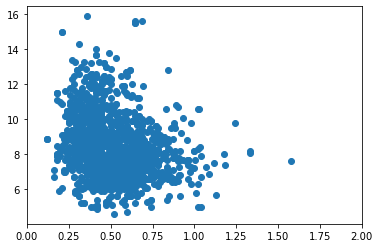

In [15]:
#menggunakan grafik
import matplotlib.pyplot as plt

plt.scatter(winecluster['volatile acidity'], winecluster['fixed acidity'])
plt.xlim(0,2)
plt.show()

In [16]:
x = dataset.iloc[:,0:2]
x.info()

from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


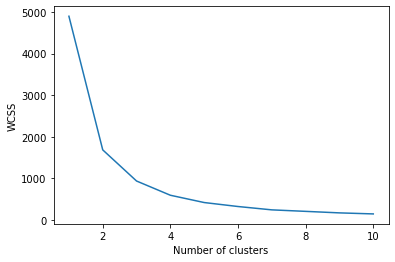

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(4)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 2, ..., 0, 0, 0])

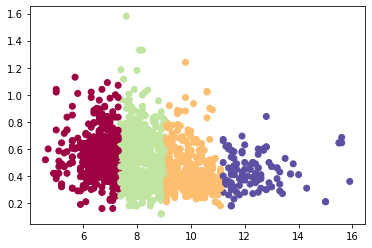

In [19]:
wine_clusters = winecluster.copy()
wine_clusters['Clusters'] = identified_clusters
plt.scatter(winecluster['fixed acidity'], winecluster['volatile acidity'], c=wine_clusters['Clusters'],cmap='Spectral')

## Challenge

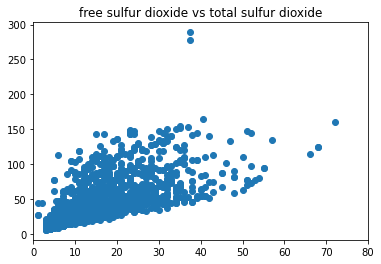

In [20]:
#Coba lakukan clustering berdasarkan pada kolom free sulfur dioxide dan 
#total sulfur dioxide, dan tampilkan hasilnya. Apakah nilai K-nya sama dengan clustering sebelumnya?

import matplotlib.pyplot as plt

plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'])
plt.xlim(0,80)
plt.title('free sulfur dioxide vs total sulfur dioxide')
plt.show()

In [21]:
x2 = dataset.iloc[:,5:7]
x2.info()

from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free sulfur dioxide   1599 non-null   float64
 1   total sulfur dioxide  1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


In [22]:
#!pip install yellowbrick  

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


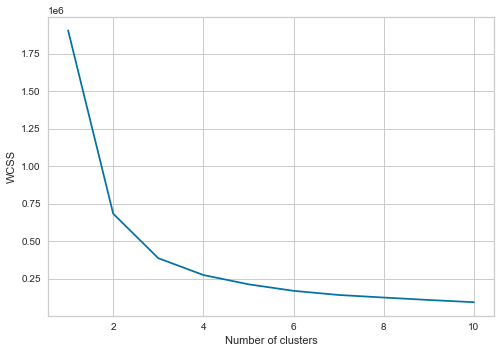

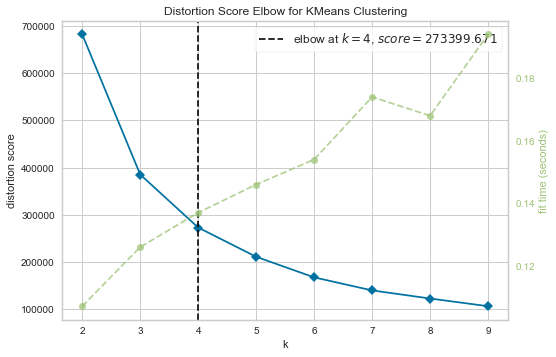

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer

wcss2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans2.fit(x2)
    wcss2.append(kmeans2.inertia_)

visualizer = KElbowVisualizer(kmeans2, k=(2,10))

    
plt.plot(range(1,11), wcss2)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
visualizer.fit(x2)
visualizer.show()

In [24]:
kmeans2 = KMeans(4)
kmeans2.fit(x2)

identified_clusters2 = kmeans2.fit_predict(x)
identified_clusters2

array([2, 0, 0, ..., 2, 2, 2])

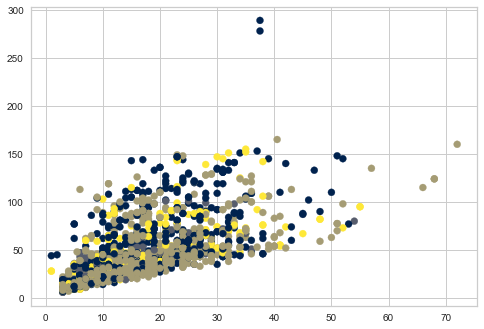

In [25]:
wine_clusters2 = winecluster.copy()
wine_clusters2['Clusters'] = identified_clusters2
plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'], c=wine_clusters2['Clusters'],cmap='cividis')

#### White Data wine

In [26]:
#Cobalah lakukan clustering pada data whitewine dan bandingkan hasilnya.
datasetwhiteclus = pd.read_csv(r"D:\SEMESTER 4\IS411 Data Modelling\LAB\Bahan Modul 7\winequality-white.csv")
datasetwhiteclus.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
datasetwhiteclus_ = datasetwhiteclus.drop(columns='quality')
datasetwhiteclus_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


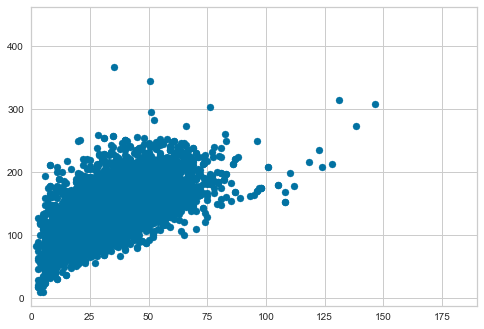

In [28]:
#menggunakan grafik
import matplotlib.pyplot as plt

plt.scatter(datasetwhiteclus_['free sulfur dioxide'], datasetwhiteclus['total sulfur dioxide'])
plt.xlim(0,190)
plt.show()

In [29]:
x3 = dataset.iloc[:,5:7]
x3.info()

from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free sulfur dioxide   1599 non-null   float64
 1   total sulfur dioxide  1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


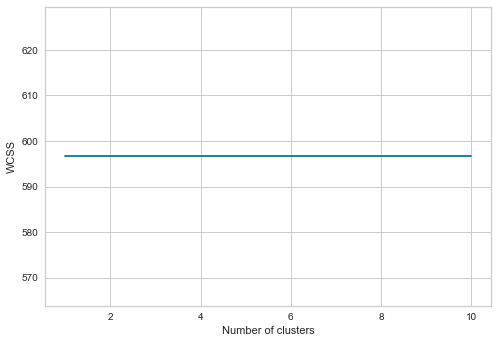

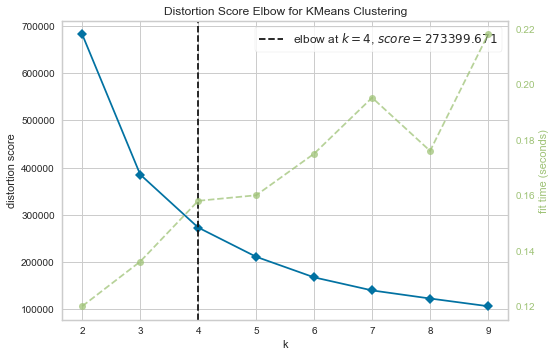

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer

wcss3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans3.fit(x3)
    wcss3.append(kmeans2.inertia_)

visualizer = KElbowVisualizer(kmeans3, k=(2,10))

plt.plot(range(1,11), wcss3)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
visualizer.fit(x3)
visualizer.show()


In [31]:
kmeans3 = KMeans(4)
kmeans3.fit(x3)

identified_clusters3 = kmeans3.fit_predict(x3)
identified_clusters3

array([2, 3, 0, ..., 0, 0, 0])

In [32]:
wine_clusters3 = datasetwhiteclus_.copy()
wine_clusters3['Clusters'] = identified_clusters3
plt.scatter(datasetwhiteclus_['free sulfur dioxide'], datasetwhiteclus_['total sulfur dioxide'], c=wine_clusters3['Clusters'],cmap='plasma')

ValueError: Length of values (1599) does not match length of index (4898)

In [33]:
!jupyter nbconvert --to html "./00000054804_Christopher Darren_Week7.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./00000054804_Christopher Darren_Week7.ipynb to html
[NbConvertApp] Writing 967566 bytes to 00000054804_Christopher Darren_Week7.html
